In [57]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

* Contribution- Individual
* Objective-Predict whether a person would fall in default or non-default 

In [58]:
data=pd.read_csv("~/Downloads/training_data.csv")
pd.set_option("display.max_columns",None)

# dimensions of the dataset


In [59]:
data.shape

(105000, 26)

# Duplicacy cross check


In [60]:
data[data.duplicated()]

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default


# statistical sumamry


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105000.0,5.249950e+04,3.031103e+04,0.000000e+00,2.624975e+04,5.249950e+04,7.874925e+04,1.049990e+05
Jobs_Reatained,105000.0,1.268865e+01,2.705442e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,8.800000e+03
Jobs_Created,105000.0,1.037925e+01,2.703408e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
Count_Employees,105000.0,9.904248e+00,5.815706e+01,0.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,7.200000e+03
Classification_Code,105000.0,4.059183e+05,2.603360e+05,0.000000e+00,2.361150e+05,4.471100e+05,5.617400e+05,9.281200e+05
Loan_Term,105000.0,1.564384e+02,1.164127e+02,0.000000e+00,9.000000e+01,1.260000e+02,1.800000e+02,6.920000e+02
Primary_Loan_Digit,105000.0,4.661622e+09,2.546599e+09,1.000034e+09,2.478163e+09,4.119824e+09,6.760484e+09,9.996003e+09
Code_Franchise,105000.0,2.707202e+03,1.266061e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.200600e+04
Default,105000.0,2.771810e-01,4.476087e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


# data types
 

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

# there are some missing values available


In [63]:
data.isnull().sum()*100/105000

ID                           0.000000
Date_Of_Disbursement         0.223810
Business                     0.014286
Jobs_Reatained               0.000000
Jobs_Created                 0.000000
Year_Of_Commitment           0.000000
Guaranteed_Approved _Loan    0.000000
Borrower_Name                0.002857
Low_Documentation_Loan       0.349524
Demography                   0.000000
State_Of_Bank                0.000000
ChargedOff_Amount            0.000000
Borrower_City                0.000000
Borrower_State               0.000000
Gross_Amount_Balance         0.000000
Count_Employees              0.000000
Classification_Code          0.000000
Loan_Approved_Gross          0.000000
Gross_Amount_Disbursed       0.000000
Loan_Term                    0.000000
Commitment_Date              0.000000
Primary_Loan_Digit           0.000000
Code_Franchise               0.000000
Name_Of_Bank                 0.000000
Revolving_Credit_Line        0.467619
Default                      0.000000
dtype: float

In [64]:
data.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


# checking noise in the data


In [65]:
data.columns
import datetime
data["Date_Of_Disbursement"]=pd.to_datetime(data.Date_Of_Disbursement)

# noise correction


In [66]:
def retina(string):
    x=string.split(".")[1:]
    y=(".").join(x)
    return y

In [67]:
data.isnull().sum()

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [68]:
data['Guaranteed_Approved _Loan']=data['Guaranteed_Approved _Loan'].apply(retina)
data['Loan_Approved_Gross']=data['Loan_Approved_Gross'].apply(retina)
data['Gross_Amount_Disbursed  ']=data['Gross_Amount_Disbursed  '].apply(retina)

In [69]:
data.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [70]:
data["Year_Of_Commitment"]=data['Year_Of_Commitment ']
data["Jobs_Created"]=data['Jobs_Created ']
data["Borrower_Name"]=data['Borrower_Name ']
data["ChargedOff_Amount"]=data['ChargedOff_Amount ']
data["Classification_Code"]=data['Classification_Code ']
data['Guaranteed_Approved_Loan']=data['Guaranteed_Approved _Loan']
data["Gross_Amount_Disbursed"]=data['Gross_Amount_Disbursed  ']


In [71]:
del data['Guaranteed_Approved _Loan']

In [72]:
data['ChargedOff_Amount']=data['ChargedOff_Amount'].apply(retina)

In [73]:
data['Gross_Amount_Balance']=data['Gross_Amount_Balance'].apply(retina)

In [74]:
data["Commitment_Date"]=pd.to_datetime(data.Commitment_Date)

In [75]:
data.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Borrower_Name ',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State',
       'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise',
       'Name_Of_Bank', 'Revolving_Credit_Line', 'Default',
       'Year_Of_Commitment', 'Jobs_Created', 'Borrower_Name',
       'ChargedOff_Amount', 'Classification_Code', 'Guaranteed_Approved_Loan',
       'Gross_Amount_Disbursed'],
      dtype='object')

In [76]:
del data['ChargedOff_Amount ']

In [77]:
del data['Classification_Code ']

In [78]:
del data['Borrower_Name ']

In [79]:
del data['Jobs_Created ']

In [80]:
del data['Year_Of_Commitment ']

In [81]:
del data['Gross_Amount_Disbursed  ']

In [82]:
data.shape

(105000, 26)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID                        105000 non-null  int64         
 1   Date_Of_Disbursement      104765 non-null  datetime64[ns]
 2   Business                  104985 non-null  object        
 3   Jobs_Reatained            105000 non-null  int64         
 4   Low_Documentation_Loan    104633 non-null  object        
 5   Demography                105000 non-null  object        
 6   State_Of_Bank             105000 non-null  object        
 7   Borrower_City             105000 non-null  object        
 8   Borrower_State            105000 non-null  object        
 9   Gross_Amount_Balance      105000 non-null  object        
 10  Count_Employees           105000 non-null  int64         
 11  Loan_Approved_Gross       105000 non-null  object        
 12  Lo

# data is cleaned and ready to perform eda


In [84]:
data.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Year_Of_Commitment,Jobs_Created,Borrower_Name,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed
0,0,1991-07-31,Existing,0,No,Undefined,AP,Mumbai,Maharashtra,0.0,38,40640000.0,126,1991-04-02,4419763001,1,Axis Bank Ltd.,No,0,1991,0,STANDARD PARTS CORPORATION,0.0,0,33121600.0,40640000.0
1,1,2006-04-30,New,0,No,Urban,TR,Delhi,Delhi,0.0,6,43647360.0,123,2006-04-10,1709796003,1,Bandhan Bank Ltd.,0,1,2006,6,FRANK & KERI AMESTOY,38283367.68,451120,32735520.0,43647360.0
2,2,2004-06-30,Existing,4,No,Urban,AS,Bengaluru,Karnataka,0.0,4,2844800.0,90,2004-05-25,7464754008,1,CSB Bank Limited,Yes,0,2004,0,TELECOMMQC L L C,0.0,541618,1422400.0,5961400.32
3,3,2006-01-31,New,9,No,Urban,BR,Ahmedabad,Gujarat,0.0,7,4064000.0,126,2005-12-21,1588745006,0,City Union Bank Ltd.,Yes,0,2006,1,"K & A AUTOMOTIVE, INC. DBA MUF",0.0,811112,2032000.0,4064000.0
4,4,2004-12-31,Existing,4,No,Urban,TR,Hyderabad,Telangana,0.0,4,30642560.0,104,2004-11-02,8037734002,1,DCB Bank Ltd.,0,1,2005,0,SUNBEAM DELI,22862519.68,722211,22981920.0,30642560.0


In [85]:
data.Year_Of_Commitment.astype

<bound method NDFrame.astype of 0         1991
1         2006
2         2004
3         2006
4         2005
          ... 
104995    1999
104996    2004
104997    2006
104998    2007
104999    2001
Name: Year_Of_Commitment, Length: 105000, dtype: object>

In [86]:
data['Gross_Amount_Balance']=data['Gross_Amount_Balance'].astype(float)
data['Loan_Approved_Gross']=data['Loan_Approved_Gross'].astype(float)
data['ChargedOff_Amount']=data['ChargedOff_Amount'].astype(float)
data['Guaranteed_Approved_Loan']=data['Guaranteed_Approved_Loan'].astype(float)
data['Gross_Amount_Disbursed']=data['Gross_Amount_Disbursed'].astype(float)
data['Year_Of_Commitment']=data['Year_Of_Commitment'].astype(object)
data['Date_Of_Disbursement']=data['Date_Of_Disbursement'].astype(object)
data['Commitment_Date']=data['Commitment_Date'].astype(object)





In [87]:
data.Revolving_Credit_Line.unique()

array(['No', '0', 'Yes', 'T', nan, 'R', '`', '2', '4', '.', '1', 'C'],
      dtype=object)

In [88]:
def change(string):
    if type(string)==int:
        return str(string)
    else:
        return string[:4]

# UNIVERIATE ANALYSIS NUMERIC

In [89]:
%matplotlib inline

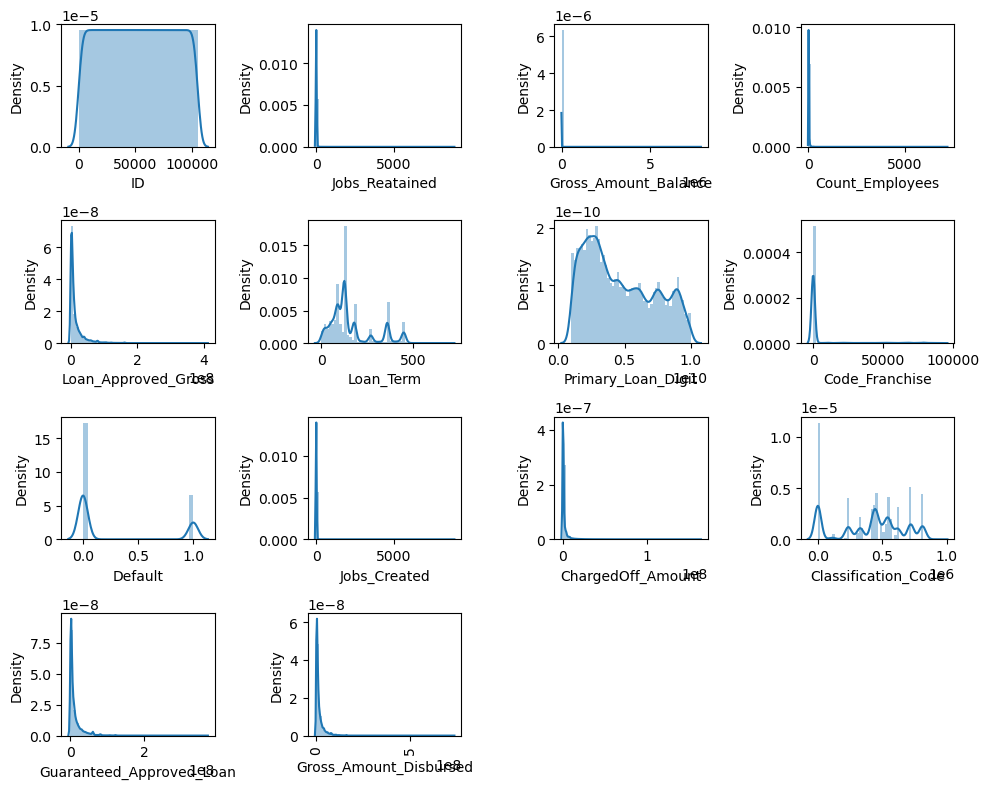

In [90]:
plt.rcParams["figure.figsize"]=[10,8]
num=data.select_dtypes(include=np.number)
a=4
b=4
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(data[i].dropna())
    c+=1
    plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# unique values in each columns

In [91]:
for i in num:
    print(i,"==",data[i].unique())

ID == [     0      1      2 ... 104997 104998 104999]
Jobs_Reatained == [   0    4    9    3    1   20    7    2   10   16   37    6   18   11
   15    5   24   65   14   12   92   13   27    8   25   22   28   63
   19   95  110   34   32 8800   84   40   23   43   50   60   35  105
   17   58   30   29   21   69   45   85  360   36   62   87   38   31
   71   48   90   70   26   55   75  475   64  135  160   41   77   33
   52   49   61   46   80   42   82   44   96   86  116  350   67   56
   68  200   39  120   78   47  109   57   88  100  184  185  165  102
  362  101 4000  140   81   66  153   74  106  107  150  138   53  250
   91  145  130  180  114  163  500   83  127   73  125  600  220  300
   59  235   54  115  137  158  103  128  275  191  295   99  108   93
  121  217  263   72   51   89  176   76  162   98  204  155  175  172
  159  214  240  119  199  104  177  151  310   79  170  118  450  146
  265  123  147  328  229  366  197  247  131  157  190  267  290  111
  133

In [92]:
data.groupby("Default").count()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Year_Of_Commitment,Jobs_Created,Borrower_Name,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed
Default,,,,,,,,,,,,,,,,,,,,,,,,,
0,75896,75718,75885,75896,75725,75896,75896,75896,75896,75896,75896,75896,75896,75896,75896,75896,75896,75425,75896,75896,75893,75896,75896,75896,75896
1,29104,29047,29100,29104,28908,29104,29104,29104,29104,29104,29104,29104,29104,29104,29104,29104,29104,29084,29104,29104,29104,29104,29104,29104,29104


In [93]:
data.Default.value_counts()*100/105000
# % of default n non default

0    72.281905
1    27.718095
Name: Default, dtype: float64

# univariate  summary
* ID column can be dropped
* need to check jobs retained,job_created,job_employees seperatly
* primary loan digit is positive skewd

# UNIVERIATE ANALYSIS FOR CATEGORICAL

In [94]:
data.select_dtypes(object).columns

Index(['Date_Of_Disbursement', 'Business', 'Low_Documentation_Loan',
       'Demography', 'State_Of_Bank', 'Borrower_City', 'Borrower_State',
       'Commitment_Date', 'Name_Of_Bank', 'Revolving_Credit_Line',
       'Year_Of_Commitment', 'Borrower_Name'],
      dtype='object')

In [95]:
data.describe(include=object)

,Date_Of_Disbursement,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line,Year_Of_Commitment,Borrower_Name
count,104765,104985,104633,105000,105000,105000,105000,105000,105000,104509,105000,104997
unique,3504,3,7,3,34,1193,41,7719,143,11,91,101068
top,1995-07-31 00:00:00,Existing,No,Urban,TR,Jhansi,Maharashtra,2004-01-30 00:00:00,ICICI Bank Ltd.,No,2007,SUBWAY
freq,1111,75091,92135,57598,15552,1504,11699,128,11215,48122,6769,147


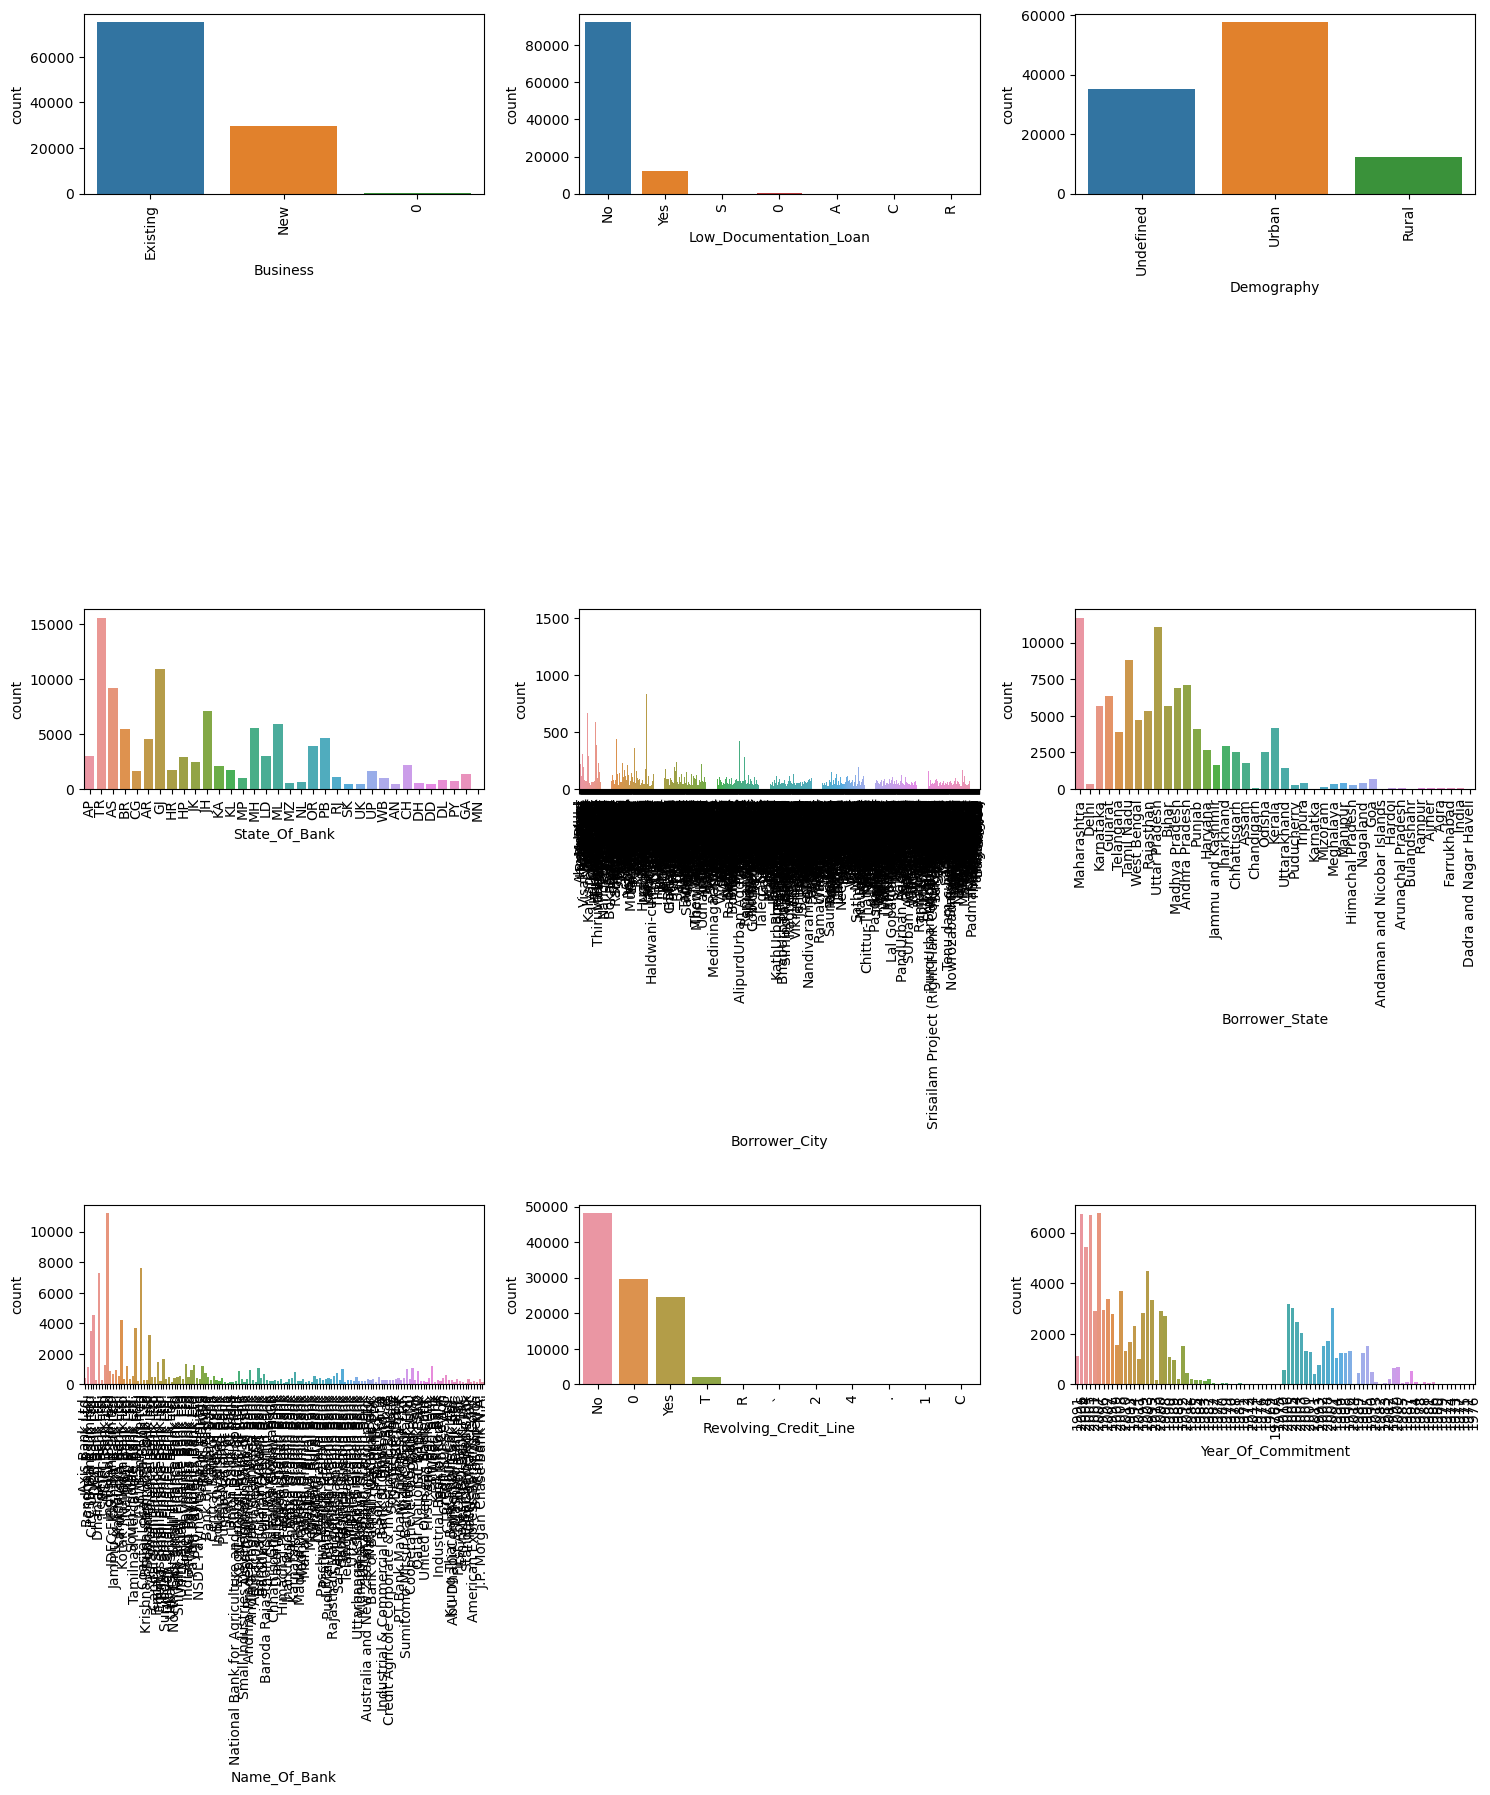

In [96]:
plt.rcParams["figure.figsize"]=[15,20]
cat=data.select_dtypes(exclude=np.number)
a=4
b=3
c=1
for i in cat:
    if i not in ["Commitment_Date","Date_Of_Disbursement","Borrower_Name"]:
        plt.subplot(a,b,c)
        sns.countplot(data.loc[:,i])
        c+=1
        plt.xticks(rotation=90)
        plt.tight_layout()
        
plt.show()

# biveriate analysis for numeric



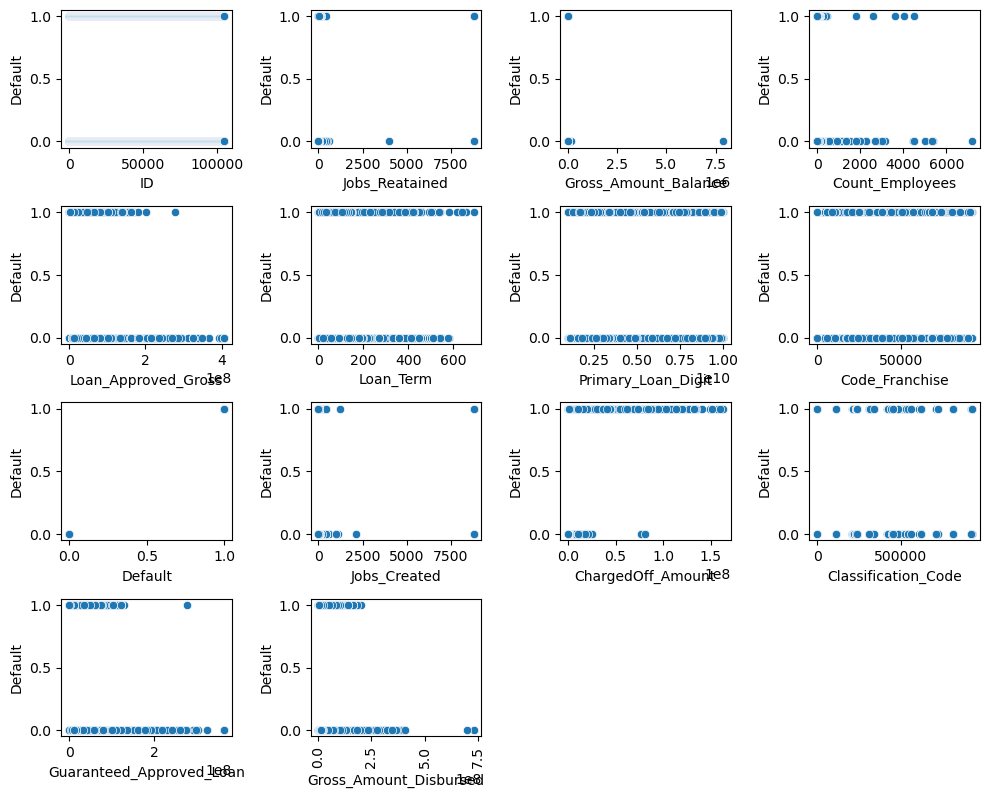

In [97]:
plt.rcParams["figure.figsize"]=[10,8]
num=data.select_dtypes(include=np.number)
a=4
b=4
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.scatterplot(data[i].dropna(),data.Default)
    c+=1
    plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# biveriate analysis for categorical data

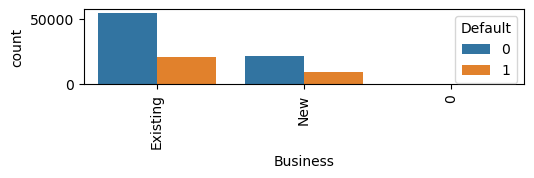

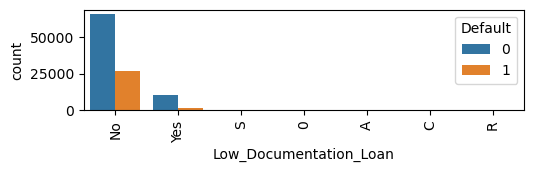

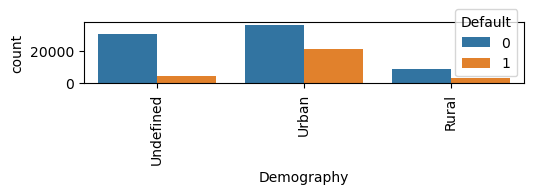

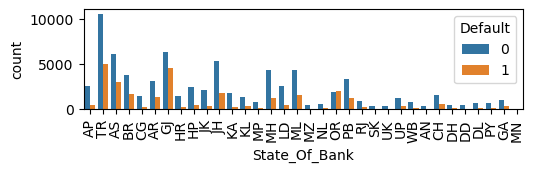

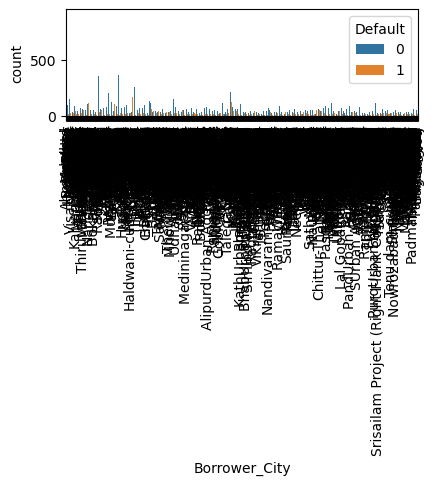

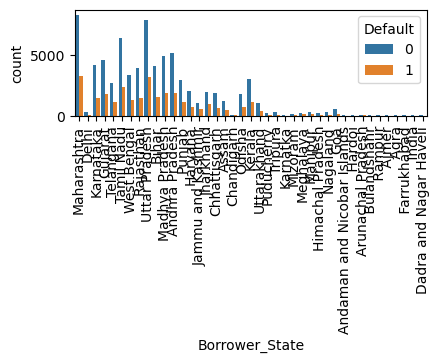

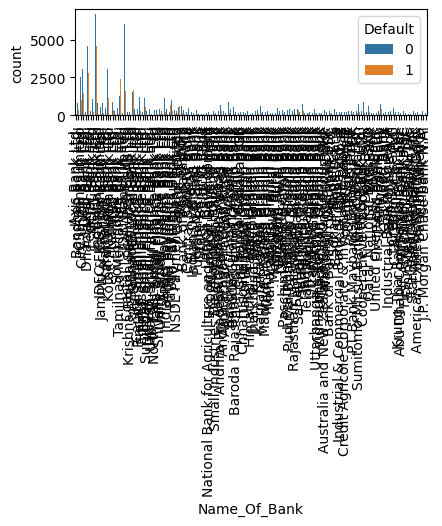

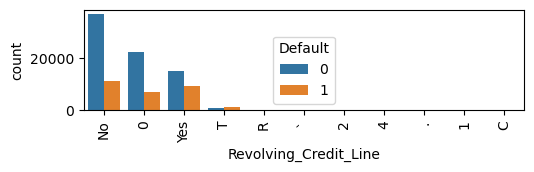

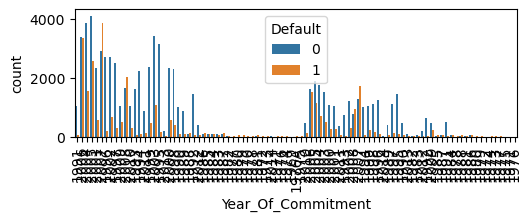

In [99]:
plt.rcParams["figure.figsize"]=[10,8]
cat=data.select_dtypes(exclude=np.number)
a=5
b=2
c=1
for i in cat:
    
    if i not in ["Commitment_Date","Date_Of_Disbursement","Borrower_Name"]:
        
        plt.subplot(a,b,c)
        sns.countplot(data.loc[:,i],hue=data.Default)
        c+=1
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# descrptive analysis for category


In [100]:
data.describe(include=object).T

,count,unique,top,freq
Date_Of_Disbursement,104765,3504,1995-07-31 00:00:00,1111
Business,104985,3,Existing,75091
Low_Documentation_Loan,104633,7,No,92135
Demography,105000,3,Urban,57598
State_Of_Bank,105000,34,TR,15552
Borrower_City,105000,1193,Jhansi,1504
Borrower_State,105000,41,Maharashtra,11699
Commitment_Date,105000,7719,2004-01-30 00:00:00,128
Name_Of_Bank,105000,143,ICICI Bank Ltd.,11215
Revolving_Credit_Line,104509,11,No,48122


# missing value treatment


In [101]:
data.isnull().sum()[data.isnull().sum()!=0]

Date_Of_Disbursement      235
Business                   15
Low_Documentation_Loan    367
Revolving_Credit_Line     491
Borrower_Name               3
dtype: int64

In [102]:
data.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Year_Of_Commitment,Jobs_Created,Borrower_Name,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed
0,0,1991-07-31 00:00:00,Existing,0,No,Undefined,AP,Mumbai,Maharashtra,0.0,38,40640000.0,126,1991-04-02 00:00:00,4419763001,1,Axis Bank Ltd.,No,0,1991,0,STANDARD PARTS CORPORATION,0.00,0,33121600.0,40640000.00
1,1,2006-04-30 00:00:00,New,0,No,Urban,TR,Delhi,Delhi,0.0,6,43647360.0,123,2006-04-10 00:00:00,1709796003,1,Bandhan Bank Ltd.,0,1,2006,6,FRANK & KERI AMESTOY,38283367.68,451120,32735520.0,43647360.00
2,2,2004-06-30 00:00:00,Existing,4,No,Urban,AS,Bengaluru,Karnataka,0.0,4,2844800.0,90,2004-05-25 00:00:00,7464754008,1,CSB Bank Limited,Yes,0,2004,0,TELECOMMQC L L C,0.00,541618,1422400.0,5961400.32
3,3,2006-01-31 00:00:00,New,9,No,Urban,BR,Ahmedabad,Gujarat,0.0,7,4064000.0,126,2005-12-21 00:00:00,1588745006,0,City Union Bank Ltd.,Yes,0,2006,1,"K & A AUTOMOTIVE, INC. DBA MUF",0.00,811112,2032000.0,4064000.00
4,4,2004-12-31 00:00:00,Existing,4,No,Urban,TR,Hyderabad,Telangana,0.0,4,30642560.0,104,2004-11-02 00:00:00,8037734002,1,DCB Bank Ltd.,0,1,2005,0,SUNBEAM DELI,22862519.68,722211,22981920.0,30642560.00


In [103]:
data.drop(["ID","Date_Of_Disbursement","Commitment_Date"],axis=1,inplace=True)

In [104]:
for i in data:
    print(i,"==",data[i].nunique())

Business == 3
Jobs_Reatained == 191
Low_Documentation_Loan == 7
Demography == 3
State_Of_Bank == 34
Borrower_City == 1193
Borrower_State == 41
Gross_Amount_Balance == 3
Count_Employees == 282
Loan_Approved_Gross == 6218
Loan_Term == 344
Primary_Loan_Digit == 105000
Code_Franchise == 1212
Name_Of_Bank == 143
Revolving_Credit_Line == 11
Default == 2
Year_Of_Commitment == 91
Jobs_Created == 128
Borrower_Name == 101068
ChargedOff_Amount == 23059
Classification_Code == 1199
Guaranteed_Approved_Loan == 10138
Gross_Amount_Disbursed == 23443


In [105]:
data.isnull().sum()[data.isnull().sum()!=0]

Business                   15
Low_Documentation_Loan    367
Revolving_Credit_Line     491
Borrower_Name               3
dtype: int64

In [106]:
from xverse.transformer import WOE
woe=WOE()

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X=data.drop("Default",axis=1)
y=data.Default

In [109]:
num=data.select_dtypes(np.number)


In [110]:
cat=data.select_dtypes(exclude=np.number)
cat.isnull().sum()

Business                   15
Low_Documentation_Loan    367
Demography                  0
State_Of_Bank               0
Borrower_City               0
Borrower_State              0
Name_Of_Bank                0
Revolving_Credit_Line     491
Year_Of_Commitment          0
Borrower_Name               3
dtype: int64

In [111]:
category=woe.treat_missing_values(cat)

In [112]:
category.isnull().sum()

Business                  0
Low_Documentation_Loan    0
Demography                0
State_Of_Bank             0
Borrower_City             0
Borrower_State            0
Name_Of_Bank              0
Revolving_Credit_Line     0
Year_Of_Commitment        0
Borrower_Name             0
dtype: int64

In [113]:
num.shape,category.shape

((105000, 13), (105000, 10))

In [114]:
from sklearn.preprocessing import RobustScaler


plt.rcParams["figure.figsize"]=[10,8]
a=4
b=4
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.boxplot(num[i])
    c+=1
    plt.tight_layout()
    plt.xticks(rotation=90)
plt.show()

In [115]:
rc=RobustScaler()

In [116]:
scaled_num=pd.DataFrame(rc.fit_transform(num),columns=num.columns)

In [117]:
newdata=pd.concat([scaled_num,category],axis=1)

In [118]:
newdata.head()

,Jobs_Reatained,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default,Jobs_Created,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Name_Of_Bank,Revolving_Credit_Line,Year_Of_Commitment,Borrower_Name
0,-0.25,0.0,4.857143,2.386364,0.000000,0.070041,0.0,0.0,0.0,0.000000,-1.373083,2.503521,2.207599,Existing,No,Undefined,AP,Mumbai,Maharashtra,Axis Bank Ltd.,No,1991,STANDARD PARTS CORPORATION
1,-0.25,0.0,0.285714,2.596591,-0.033333,-0.562785,0.0,1.0,6.0,62.045908,0.012315,2.470070,2.409780,New,No,Urban,TR,Delhi,Delhi,Bandhan Bank Ltd.,0,2006,FRANK & KERI AMESTOY
2,0.75,0.0,0.000000,-0.255682,-0.400000,0.781102,0.0,0.0,0.0,0.000000,0.290236,-0.242958,-0.123800,Existing,No,Urban,AS,Bengaluru,Karnataka,CSB Bank Limited,Yes,2004,TELECOMMQC L L C
3,2.00,0.0,0.428571,-0.170455,0.000000,-0.591053,-1.0,0.0,1.0,0.000000,1.117856,-0.190141,-0.251360,New,No,Urban,BR,Ahmedabad,Gujarat,City Union Bank Ltd.,Yes,2006,"K & A AUTOMOTIVE, INC. DBA MUF"
4,0.75,0.0,0.000000,1.687500,-0.244444,0.914904,0.0,1.0,0.0,37.053318,0.844840,1.625000,1.535483,Existing,No,Urban,TR,Hyderabad,Telangana,DCB Bank Ltd.,0,2005,SUNBEAM DELI


In [119]:
newdata.drop("Year_Of_Commitment",axis=1,inplace=True)

In [120]:
#pip install feature_engine

In [121]:
from feature_engine.encoding import WoEEncoder

In [122]:
newdata.Revolving_Credit_Line.unique()

array(['No', '0', 'Yes', 'T', 'NA', 'R', '`', '2', '4', '.', '1', 'C'],
      dtype=object)

newdata.drop("Revolving_Credit_Line",axis=1,inplace=True)

In [123]:
newdata.Borrower_Name.unique()

array(['STANDARD PARTS CORPORATION', 'FRANK & KERI AMESTOY',
       'TELECOMMQC L L C', ..., 'Pho 777',
       'FLEX TEMP CORPORATION dba LABO', 'SOUTH MOUNTAIN FITNESS, A PART'],
      dtype=object)

In [124]:
del newdata["Borrower_Name"]

In [125]:
woe=WoEEncoder()

In [126]:
newdata.Revolving_Credit_Line.unique()

array(['No', '0', 'Yes', 'T', 'NA', 'R', '`', '2', '4', '.', '1', 'C'],
      dtype=object)

In [127]:
nume=["No","0","NA","`",".","C"]
def credit(string):
    if string in nume:
        return "No"
    else:
        return "Yes"
    

In [128]:
newdata["Revolving_Credit_Line"]=newdata["Revolving_Credit_Line"].apply(credit)

In [129]:
X=newdata.drop("Default",axis=1)
y=newdata.Default

In [130]:
data1=woe.fit_transform(X,y)

In [131]:
data1.shape

(105000, 20)

In [132]:
X=data1
#y

In [175]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=10)

In [176]:
from sklearn.linear_model import LogisticRegression


In [177]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix,classification_report,f1_score

In [178]:
lr=LogisticRegression()

In [179]:
model=lr.fit(xtrain,ytrain)

In [180]:
model.score(xtrain,ytrain)

0.9862585034013606

In [181]:
pred=model.predict(xtest)

In [182]:
print("accuracy of the logistic regression model on test set ",model.score(xtest,ytest))
print("*********************************************")
print("classification report logistic regression model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of logistic regression model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of logistic regression model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of logistic regression model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of logistic regression model")
print(confusion_matrix(ytest,pred))


accuracy of the logistic regression model on test set  0.9875555555555555
*********************************************
classification report logistic regression model                precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     22740
         1.0       0.99      0.97      0.98      8760

    accuracy                           0.99     31500
   macro avg       0.99      0.98      0.98     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of logistic regression model  0.9691780821917808
*********************************************
precision score of logistic regression model  0.9858337203901533
*********************************************
f2score of logistic regression model  0.9774349527976053
*********************************************
confusion metrics of logistic regression model
[[22618   122]
 [  270  8490]]


# Naive's bays 


In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
bays=GaussianNB()
model_bays=bays.fit(xtrain,ytrain)
pred=model_bays.predict(xtest)

In [192]:
print("accuracy of the Bays model on test set ",model_bays.score(xtest,ytest))
print("*********************************************")
print("classification report Bays model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of Bays model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of Bays model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of Bays model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of Bays model")
print(confusion_matrix(ytest,pred))

accuracy of the Bays model on test set  0.4868571428571429
*********************************************
classification report Bays model                precision    recall  f1-score   support

         0.0       0.99      0.29      0.45     22740
         1.0       0.35      1.00      0.52      8760

    accuracy                           0.49     31500
   macro avg       0.67      0.64      0.48     31500
weighted avg       0.82      0.49      0.47     31500

*********************************************
recall score of Bays model  0.9957762557077625
*********************************************
precision score of Bays model  0.3510261569416499
*********************************************
f2score of Bays model  0.5190717048497471
*********************************************
confusion metrics of Bays model
[[ 6613 16127]
 [   37  8723]]


In [197]:
#bays model didnt work well as there is high range value in Gross amount
#which according to bays algo.becomes the limitation.


# KNN model

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn=KNeighborsClassifier()

In [200]:
model_knn=knn.fit(xtrain,ytrain)
pred=model_knn.predict(xtest)

In [201]:
print("accuracy of the KNN model on test set ",model_knn.score(xtest,ytest))
print("*********************************************")
print("classification report KNN model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of KNN model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of KNN model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of KNN model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of KNN model")
print(confusion_matrix(ytest,pred))

accuracy of the KNN model on test set  0.9796825396825397
*********************************************
classification report KNN model                precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     22740
         1.0       0.98      0.95      0.96      8760

    accuracy                           0.98     31500
   macro avg       0.98      0.97      0.97     31500
weighted avg       0.98      0.98      0.98     31500

*********************************************
recall score of KNN model  0.9473744292237443
*********************************************
precision score of KNN model  0.9788865298419439
*********************************************
f2score of KNN model  0.9628727230537184
*********************************************
confusion metrics of KNN model
[[22561   179]
 [  461  8299]]


In [202]:
# we will go with the model giving high accuracy since the required performance metrics of hackathon is accuracy score

# Decision Tree (Non parametric approach)

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=5,class_weight="balanced")
modeltree=dtree.fit(xtrain,ytrain)
pred=modeltree.predict(xtest)

In [188]:
print("accuracy of the Decision tree model on test set ",modeltree.score(xtest,ytest))
print("*********************************************")
print("classification report Decision tree model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of Decision tree model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of Decision tree model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of Decision tree model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of Decision tree model")
print(confusion_matrix(ytest,pred))


accuracy of the Decision tree model on test set  0.9945714285714286
*********************************************
classification report Decision tree model                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      1.00      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      1.00      0.99     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of Decision tree model  0.9962328767123287
*********************************************
precision score of Decision tree model  0.9844331641285956
*********************************************
f2score of Decision tree model  0.9902978723404257
*********************************************
confusion metrics of Decision tree model
[[22602   138]
 [   33  8727]]


# Ensemble bagging


In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rfc=RandomForestClassifier()

In [205]:
model_rfc=rfc.fit(xtrain,ytrain)
pred=model_rfc.predict(xtest)

In [208]:
print("accuracy of the Randomforest classifer model on test set ",model_rfc.score(xtest,ytest))
print("*********************************************")
print("classification report Randomforest classifer model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of Randomforest classifer model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of Randomforest classifer model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of Randomforest classifer model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of Randomforest classifer model")
print(confusion_matrix(ytest,pred))

accuracy of the Randomforest classifer model on test set  0.9945714285714286
*********************************************
classification report Randomforest classifer model                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      1.00      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of Randomforest classifer model  0.9957762557077625
*********************************************
precision score of Randomforest classifer model  0.9848707237213503
*********************************************
f2score of Randomforest classifer model  0.990293466538003
*********************************************
confusion metrics of Randomforest classifer model
[[22606   134]
 [   37  8723]]


# Ada boosting 


In [209]:
from sklearn.ensemble import AdaBoostClassifier

In [210]:
ada=AdaBoostClassifier()

In [211]:
model_ada=ada.fit(xtrain,ytrain)
pred=model_ada.predict(xtest)

In [212]:
print("accuracy of the ada boosting models on test set ",model_ada.score(xtest,ytest))
print("*********************************************")
print("classification report ada boosting models ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of ada boosting models ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of ada boosting models ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of ada boosting models ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of ada boosting models")
print(confusion_matrix(ytest,pred))

accuracy of the ada boosting models on test set  0.9944761904761905
*********************************************
classification report ada boosting models                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      1.00      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of ada boosting models  0.9957762557077625
*********************************************
precision score of ada boosting models  0.9845372460496614
*********************************************
f2score of ada boosting models  0.9901248581157777
*********************************************
confusion metrics of ada boosting models
[[22603   137]
 [   37  8723]]


# gradient boosting

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

In [214]:
gbc=GradientBoostingClassifier()

In [215]:
model_gbc=gbc.fit(xtrain,ytrain)
pred=model_gbc.predict(xtest)

In [216]:
print("accuracy of the Gradient boosting models on test set ",model_gbc.score(xtest,ytest))
print("*********************************************")
print("classification report Gradient boosting models ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of Gradient boosting models ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of Gradient boosting models ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of Gradient boosting models ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of Gradient boosting models")
print(confusion_matrix(ytest,pred))

accuracy of the Gradient boosting models on test set  0.9940952380952381
*********************************************
classification report Gradient boosting models                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      0.99      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of Gradient boosting models  0.994406392694064
*********************************************
precision score of Gradient boosting models  0.9845162748643761
*********************************************
f2score of Gradient boosting models  0.98943661971831
*********************************************
confusion metrics of Gradient boosting models
[[22603   137]
 [   49  8711]]


# XGBOOST

In [217]:
from xgboost import XGBClassifier

In [218]:
xgbc=XGBClassifier()

In [219]:
model_xgbc=xgbc.fit(xtrain,ytrain)
pred=model_xgbc.predict(xtest)

In [220]:
print("accuracy of the XG boosting model on test set ",model_xgbc.score(xtest,ytest))
print("*********************************************")
print("classification report XG boosting model ",classification_report(ytest,pred))
print("*********************************************")
print("recall score of XG boosting model ",recall_score(ytest,pred))
print("*********************************************")
print("precision score of XG boosting model ",precision_score(ytest,pred))
print("*********************************************")
print("f2score of XG boosting model ",f1_score(ytest,pred))
print("*********************************************")
print("confusion metrics of XG boosting model")
print(confusion_matrix(ytest,pred))

accuracy of the XG boosting model on test set  0.9948253968253968
*********************************************
classification report XG boosting model                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      1.00      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      1.00      0.99     31500
weighted avg       0.99      0.99      0.99     31500

*********************************************
recall score of XG boosting model  0.9970319634703196
*********************************************
precision score of XG boosting model  0.9845564197948371
*********************************************
f2score of XG boosting model  0.9907549203108161
*********************************************
confusion metrics of XG boosting model
[[22603   137]
 [   26  8734]]


In [233]:
# final accuracy report of the models
pd.Series([model.score(xtest,ytest),model_bays.score(xtest,ytest),
           model_knn.score(xtest,ytest),modeltree.score(xtest,ytest),
          model_rfc.score(xtest,ytest),model_ada.score(xtest,ytest),model_gbc.score(xtest,ytest),
          model_xgbc.score(xtest,ytest)],index=["Logistic_reg","Naive_bays","KNN","dtree","RandomforestC",
                                               "AdaBoostC","GradientBC","XGBOOST"]).sort_values(ascending=False)

XGBOOST          0.994825
dtree            0.994571
RandomforestC    0.994571
AdaBoostC        0.994476
GradientBC       0.994095
Logistic_reg     0.987556
KNN              0.979683
Naive_bays       0.486857
dtype: float64

# we will further do some fine tuning in the model that giving better accuracy 

In [940]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
lr = RandomForestClassifier(n_estimators=500,class_weight='balanced')
lr.fit(xtrain,ytrain)
print("Training Accuracy")
print(lr.score(xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(xtest,ytest))
predicted = lr.predict(xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(lr,xtrain,ytrain,cv=5,scoring='recall')
print(scoresdt)
print("Average Recall")
print(np.mean(scoresdt))

Training Accuracy
1.0
Testing Accuracy
0.9944761904761905
[[22605   135]
 [   39  8721]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22740
         1.0       0.98      1.00      0.99      8760

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500

[0.9953294  0.99606783 0.99533055 0.99238142 0.99778815]
Average Recall
0.9953794706021233


In [1123]:
param_grid = {
    'max_depth': [3, 5, 7, 9,10],
    'min_samples_leaf': [1, 2, 3, 4,5]
}

# Create the random forest classifier
clf = DecisionTreeClassifier(class_weight='balanced')

# Perform grid search CV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 5}
Best score: 0.9939455782312926


In [945]:
from sklearn.model_selection import GridSearchCV

In [947]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create the random forest classifier
clf = RandomForestClassifier()

# Perform grid search CV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 200}
Best score: 0.993795918367347


In [1311]:
clf=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,class_weight="balanced")

In [1312]:
model=clf.fit(xtrain,ytrain)

In [1313]:
model.score(xtrain,ytrain)

0.9938095238095238

In [1314]:
from sklearn.ensemble import GradientBoostingClassifier

In [1315]:
gboost=GradientBoostingClassifier(n_estimators=300)

In [1316]:
modelg=gboost.fit(xtrain,ytrain)

In [1317]:
modelg.score(xtrain,ytrain)

0.9952789115646259

In [1318]:
gb_pred=modelg.predict(final)

In [1319]:
modelg.score(xtest,ytest)

0.9937777777777778

In [ ]:
# main part above

In [1330]:
sample_LAST1=pd.read_csv(r"Downloads\Sample_Submission.csv")

In [1331]:
sample_last["Default"]=LAST_pred

In [1334]:
sample_last.to_csv("LAST_PRED10000.csv",index=False)

In [1333]:
cd

C:\Users\Sourav Rawat


In [708]:
from sklearn.tree import DecisionTreeClassifier


0.9941224489795918

In [1326]:
model.score(xtest,ytest)

0.9945714285714286

In [1328]:
LAST_pred=model.predict(final)

array([1., 0., 1., ..., 0., 0., 0.])

In [1327]:
d_pred=model.predict(xtest)

In [714]:
confusion_matrix(ytest,d_pred)

array([[22602,   138],
       [   33,  8727]], dtype=int64)

In [715]:
np.mean(scoresdt)

0.9954286227279528

# working on test dataset

In [1275]:
df=pd.read_csv(r"C:\Users\Sourav Rawat\Downloads\testing_data.csv")

In [1276]:
df.shape

(45000, 25)

In [1277]:
df.isnull().sum()

ID                               0
Date_Of_Disbursement           108
Business                         6
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    2
Low_Documentation_Loan         133
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                  49
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line        13825
dtype: int64

In [1278]:
newdata.head(1)

,Jobs_Reatained,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default,Jobs_Created,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Name_Of_Bank,Revolving_Credit_Line
0,-0.25,0.0,4.857143,2.386364,0.0,0.070041,0.0,0.0,0.0,0.0,-1.373083,2.503521,2.207599,Existing,No,Undefined,AP,Mumbai,Maharashtra,Axis Bank Ltd.,No


In [1279]:
dataa.head(1)

,Business,Jobs_Reatained,Jobs_Created,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed
0,Existing,19,0,No,Urban,GJ,Safidon,Haryana,0.0,17,8128000.0,57,1702825000,0,ICICI Bank Ltd.,Yes,8050784.0,326199,4064000.0,9403852.16


In [1280]:
dataa=df.drop(["ID","Date_Of_Disbursement","Year_Of_Commitment ","Borrower_Name "
               ,"Commitment_Date"],axis=1)

In [1281]:
dataa.shape,newdata.shape

((45000, 20), (105000, 21))

In [1282]:
dataa.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,Existing,19,0,Rs.4064000.0,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,17,326199,Rs.8128000.0,Rs.9403852.16,57,1702825000,0,ICICI Bank Ltd.,Yes
1,Existing,0,0,Rs.1463040.0,Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,2,0,Rs.1625600.0,Rs.1625600.0,90,7908833003,1,South Indian Bank Ltd.,No
2,Existing,7,5,Rs.812800.0,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,2,541611,Rs.1625600.0,Rs.3450336.0,81,2361626001,1,IDBI Bank Limited,Yes
3,New,2,0,Rs.2032000.0,No,Urban,TR,Rs.0.0,Musabani,Jharkhand,Rs.0.0,2,0,Rs.4064000.0,Rs.6916196.48,18,3814664008,1,Aryavart Bank,Yes
4,Existing,0,0,Rs.23469600.0,No,Rural,TR,Rs.0.0,Adityapur,Jharkhand,Rs.0.0,6,441310,Rs.31292800.0,Rs.31292800.0,219,8830244003,1,Paschim Banga Gramin Bank,No


In [1283]:
dataa.isnull().columns

Index(['Business', 'Jobs_Reatained', 'Jobs_Created ',
       'Guaranteed_Approved _Loan', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Primary_Loan_Digit',
       'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line'],
      dtype='object')

In [1284]:
dataa["ChargedOff_Amount"]=dataa['ChargedOff_Amount ']
dataa["Classification_Code"]=dataa['Classification_Code ']
dataa['Guaranteed_Approved_Loan']=dataa['Guaranteed_Approved _Loan']


In [1285]:
dataa.columns

Index(['Business', 'Jobs_Reatained', 'Jobs_Created ',
       'Guaranteed_Approved _Loan', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Primary_Loan_Digit',
       'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line',
       'ChargedOff_Amount', 'Classification_Code', 'Guaranteed_Approved_Loan'],
      dtype='object')

In [1286]:
dataa['Gross_Amount_Disbursed']=dataa['Gross_Amount_Disbursed  ']


In [1287]:
del dataa['ChargedOff_Amount ']
del dataa['Classification_Code ']
del dataa['Guaranteed_Approved _Loan']

In [1288]:
del dataa['Gross_Amount_Disbursed  ']


In [1289]:
dataa.shape

(45000, 20)

In [1290]:
dataa['Guaranteed_Approved_Loan']=dataa['Guaranteed_Approved_Loan'].apply(retina)
dataa['Loan_Approved_Gross']=dataa['Loan_Approved_Gross'].apply(retina)


In [1291]:
dataa['ChargedOff_Amount']=dataa['ChargedOff_Amount'].apply(retina)


In [1292]:
dataa['Gross_Amount_Balance']=dataa['Gross_Amount_Balance'].apply(retina)


In [1293]:
dataa['Gross_Amount_Disbursed']=dataa['Gross_Amount_Disbursed'].apply(retina)


In [1294]:
dataa.head(1)

,Business,Jobs_Reatained,Jobs_Created,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,ChargedOff_Amount,Classification_Code,Guaranteed_Approved_Loan,Gross_Amount_Disbursed
0,Existing,19,0,No,Urban,GJ,Safidon,Haryana,0.0,17,8128000.0,57,1702825000,0,ICICI Bank Ltd.,Yes,8050784.0,326199,4064000.0,9403852.16


In [1295]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Business                  44994 non-null  object
 1   Jobs_Reatained            45000 non-null  int64 
 2   Jobs_Created              45000 non-null  int64 
 3   Low_Documentation_Loan    44867 non-null  object
 4   Demography                45000 non-null  object
 5   State_Of_Bank             45000 non-null  object
 6   Borrower_City             45000 non-null  object
 7   Borrower_State            44951 non-null  object
 8   Gross_Amount_Balance      45000 non-null  object
 9   Count_Employees           45000 non-null  int64 
 10  Loan_Approved_Gross       45000 non-null  object
 11  Loan_Term                 45000 non-null  int64 
 12  Primary_Loan_Digit        45000 non-null  int64 
 13  Code_Franchise            45000 non-null  int64 
 14  Name_Of_Bank          

In [1296]:
dataa['Gross_Amount_Balance']=dataa['Gross_Amount_Balance'].astype(float)
dataa['Loan_Approved_Gross']=dataa['Loan_Approved_Gross'].astype(float)
dataa['ChargedOff_Amount']=dataa['ChargedOff_Amount'].astype(float)
dataa['Guaranteed_Approved_Loan']=dataa['Guaranteed_Approved_Loan'].astype(float)






In [1297]:
dataa['Gross_Amount_Disbursed']=dataa['Gross_Amount_Disbursed'].astype(float)


dataa["Revolving_Credit_Line"]=dataa["Revolving_Credit_Line"].apply(credit)

In [1298]:
num=dataa.select_dtypes(np.number)
num.isnull().sum()

Jobs_Reatained              0
Jobs_Created                0
Gross_Amount_Balance        0
Count_Employees             0
Loan_Approved_Gross         0
Loan_Term                   0
Primary_Loan_Digit          0
Code_Franchise              0
ChargedOff_Amount           0
Classification_Code         0
Guaranteed_Approved_Loan    0
Gross_Amount_Disbursed      0
dtype: int64

In [1299]:
cat=dataa.select_dtypes(exclude=np.number)
cat.isnull().sum()

Business                      6
Low_Documentation_Loan      133
Demography                    0
State_Of_Bank                 0
Borrower_City                 0
Borrower_State               49
Name_Of_Bank                  0
Revolving_Credit_Line     13825
dtype: int64

In [1300]:
from xverse.transformer import WOE
woe=WOE()

In [1301]:
category1=woe.treat_missing_values(cat)

In [1302]:
category1.isnull().sum()

Business                  0
Low_Documentation_Loan    0
Demography                0
State_Of_Bank             0
Borrower_City             0
Borrower_State            0
Name_Of_Bank              0
Revolving_Credit_Line     0
dtype: int64

In [1303]:
scaled_num=pd.DataFrame(rc.fit_transform(num),columns=num.columns)

In [1304]:
test_newdata=pd.concat([scaled_num,category1],axis=1)

from feature_engine.encoding import WoEEncoder

In [1305]:
from feature_engine.encoding import CountFrequencyEncoder

In [1306]:
nd=CountFrequencyEncoder()

In [1307]:
cat1=nd.fit_transform(category1)

In [1308]:
cate=cat1/10000
cate

,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Name_Of_Bank,Revolving_Credit_Line
0,3.2062,3.9476,2.4586,0.4686,0.0040,0.1107,0.4742,1.0684
1,3.2062,0.5217,1.5020,0.3796,0.0041,0.3865,0.0243,2.0491
2,3.2062,3.9476,2.4586,0.2605,0.0015,0.2269,0.3292,1.0684
3,1.2878,3.9476,2.4586,0.6603,0.0028,0.1278,0.0453,1.0684
4,3.2062,3.9476,0.5394,0.6603,0.0016,0.1278,0.0135,2.0491
...,...,...,...,...,...,...,...,...
44995,3.2062,3.9476,2.4586,0.2605,0.0141,0.2708,0.0441,1.0684
44996,3.2062,3.9476,2.4586,0.0762,0.0035,0.1050,0.0080,1.3825
44997,3.2062,3.9476,2.4586,0.0739,0.0028,0.2506,0.0453,1.3825
44998,3.2062,3.9476,2.4586,0.1925,0.0034,0.3002,0.0241,1.3825


In [1309]:
final=pd.concat([scaled_num,cate],axis=1)

WoEEncoder(variables=["Business","Low_Documentation_Loan","State_Of_Bank","Borrower_City",
                      "Borrower_State","Name_Of_Bank"])

In [1310]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jobs_Reatained            45000 non-null  float64
 1   Jobs_Created              45000 non-null  float64
 2   Gross_Amount_Balance      45000 non-null  float64
 3   Count_Employees           45000 non-null  float64
 4   Loan_Approved_Gross       45000 non-null  float64
 5   Loan_Term                 45000 non-null  float64
 6   Primary_Loan_Digit        45000 non-null  float64
 7   Code_Franchise            45000 non-null  float64
 8   ChargedOff_Amount         45000 non-null  float64
 9   Classification_Code       45000 non-null  float64
 10  Guaranteed_Approved_Loan  45000 non-null  float64
 11  Gross_Amount_Disbursed    45000 non-null  float64
 12  Business                  45000 non-null  float64
 13  Low_Documentation_Loan    45000 non-null  float64
 14  Demogr

In [881]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Jobs_Reatained            105000 non-null  float64
 1   Gross_Amount_Balance      105000 non-null  float64
 2   Count_Employees           105000 non-null  float64
 3   Loan_Approved_Gross       105000 non-null  float64
 4   Loan_Term                 105000 non-null  float64
 5   Primary_Loan_Digit        105000 non-null  float64
 6   Code_Franchise            105000 non-null  float64
 7   Default                   105000 non-null  float64
 8   Jobs_Created              105000 non-null  float64
 9   ChargedOff_Amount         105000 non-null  float64
 10  Classification_Code       105000 non-null  float64
 11  Guaranteed_Approved_Loan  105000 non-null  float64
 12  Gross_Amount_Disbursed    105000 non-null  float64
 13  Business                  105000 non-null  o

In [926]:
newdata.shape,final.shape

((105000, 20), (45000, 19))

In [927]:
newdata.shape,final.shape

((105000, 20), (45000, 19))

In [934]:
fmodel=model.predict(final)

In [1005]:
final.columns

Index(['Jobs_Reatained', 'Jobs_Created ', 'Gross_Amount_Balance',
       'Count_Employees', 'Loan_Approved_Gross', 'Loan_Term',
       'Primary_Loan_Digit', 'Code_Franchise', 'ChargedOff_Amount',
       'Classification_Code', 'Guaranteed_Approved_Loan',
       'Gross_Amount_Disbursed', 'Business', 'Low_Documentation_Loan',
       'Demography', 'State_Of_Bank', 'Borrower_City', 'Borrower_State',
       'Name_Of_Bank'],
      dtype='object')

In [1007]:
final['Jobs_Created']=final['Jobs_Created ']

In [1009]:
del final['Jobs_Created ']

In [1016]:
final.columns

Index(['Jobs_Reatained', 'Gross_Amount_Balance', 'Count_Employees',
       'Loan_Approved_Gross', 'Loan_Term', 'Primary_Loan_Digit',
       'Code_Franchise', 'ChargedOff_Amount', 'Classification_Code',
       'Guaranteed_Approved_Loan', 'Gross_Amount_Disbursed', 'Business',
       'Low_Documentation_Loan', 'Demography', 'State_Of_Bank',
       'Borrower_City', 'Borrower_State', 'Name_Of_Bank', 'Jobs_Created'],
      dtype='object')

In [1]:
#importing submission file
#sample=pd.read_csv("Sample_Submission.csv")

In [1092]:
sample3=pd.read_csv(r"Downloads\Sample_Submission.csv")

In [982]:
sample1["Default"]=gb_pred

In [988]:
sample1.to_csv("GBOOST_FINAL1.csv",index=False)

In [989]:
cd

C:\Users\Sourav Rawat


In [935]:
sample["Default"]=fmodel

In [969]:
sample["Default"]=gb_pred

In [970]:
sample.to_csv("gboost_final.csv",index=False)

In [971]:
cd

C:\Users\Sourav Rawat


,ID,Default
0,105000,1.0
1,105001,0.0
2,105002,1.0
3,105003,0.0
4,105004,0.0
...,...,...
44995,149995,1.0
44996,149996,0.0
44997,149997,0.0
44998,149998,0.0


In [939]:
#export the file
sample.to_csv("Dtree_model.csv",index=False)

In [938]:
cd

C:\Users\Sourav Rawat


In [942]:
# random forest
sample.to_csv("Random_forestclassifier.csv",index=False)

In [943]:
cd

C:\Users\Sourav Rawat


,ID,Default
0,105000,1.0
1,105001,0.0
2,105002,1.0
3,105003,0.0
4,105004,0.0
...,...,...
44995,149995,1.0
44996,149996,0.0
44997,149997,0.0
44998,149998,0.0


In [1033]:
#trying xtreem gb
# Import necessary libraries
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


# Create the XGBoost classifier
clf = XGBClassifier()

# Fit the classifier to the training data
xgboostmodel=clf.fit(xtrain, ytrain)

In [1034]:
xgboostmodel.score(xtrain,ytrain)

0.9978775510204082

In [2]:
#xgboostmodel.score(xtest,ytest)

In [1037]:
xgmodelfinal1=xgboostmodel.predict(final)

In [1031]:
#xtrain=pd.concat([xtrain,x],axis=1)
#made important hidden changes

In [1038]:
sample2["Default"]=xgmodelfinal1

In [1041]:
sample2.to_csv("FINAL_XTREEMBOOST.csv",index=False)

In [1042]:
cd

C:\Users\Sourav Rawat


In [991]:
#pip install xgboost

     --------------------------------------- 89.1/89.1 MB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1083]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate':[0.1,0.4,0.6,0.9]
}

# Create the random forest classifier
clf = XGBClassifier()

# Perform grid search CV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}
Best score: 0.9940816326530613


In [1105]:
MODEL=XGBClassifier(learning_rate=0.01,max_depth=9,n_estimators=300)

In [1106]:
ggb=MODEL.fit(xtrain,ytrain)

In [1107]:
ggb.score(xtrain,ytrain)

0.9946666666666667

In [1112]:
sample4=pd.read_csv(r"Downloads\Sample_Submission.csv")

In [1113]:
xgboost100=ggb.predict(final)

In [1114]:
sample["Default"]=xgboost100

In [1115]:
sample3.to_csv("xgboost100.csv",index=False)

In [1116]:
cd

C:\Users\Sourav Rawat


In [1093]:
end_pred=ggb.predict(final)

In [1094]:
sample3["Default"]=end_pred

In [1095]:
sample3.to_csv("FINAL_PREDICTION.csv",index=False)

In [1096]:
cd

C:\Users\Sourav Rawat


In [1061]:
from sklearn.ensemble import BaggingClassifier

In [1070]:
bagging_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight="balanced"),
                 n_estimators=100,bootstrap_features=True)

In [1071]:
bag_model=bagging_model.fit(xtrain,ytrain)

In [1072]:
bag_model.score(xtrain,ytrain)

0.9999863945578231

In [1124]:
df

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,TR,Rs.0.0,Musabani,Jharkhand,Rs.0.0,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,TR,Rs.0.0,Adityapur,Jharkhand,Rs.0.0,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,149995,30-Nov-05,Existing,3,1,2005,Rs.1625600.0,ULTIMATE COMPUTERS,No,Urban,ML,Rs.1838309.76,Bhuj,Gujarat,Rs.0.0,3,423690,Rs.3251200.0,Rs.2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes
44996,149996,31-Jul-02,Existing,12,0,2002,Rs.29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,KL,Rs.0.0,Rajnandgaon,Chhattisgarh,Rs.0.0,12,621210,Rs.39542720.0,Rs.36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN
44997,149997,13-Aug-08,Existing,0,15,2008,Rs.60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,UP,Rs.0.0,Sankeshwara,Karnataka,Rs.0.0,4,621111,Rs.60878720.0,Rs.60878720.0,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN
44998,149998,28-Feb-03,Existing,2,0,2003,Rs.2032000.0,CHO & SONS CORP,No,Urban,PB,Rs.0.0,Kakinada,Andhra Pradesh,Rs.0.0,2,445120,Rs.4064000.0,Rs.4064000.0,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN
